#MOVIE GENRE CLASSIFICATION

**In this machine learning project, we aim to predict a movie's genre based on its plot summary using NLP techniques and machine learning algorithms. We'll employ TF-IDF (Term Frequency-Inverse Document Frequency) for feature extraction and classifiers like Naive Bayes, Logistic Regression, and Support Vector Machines (SVM) to build an accurate genre classification model. The project involves preprocessing text data, transforming it into numerical representations, and training the models to achieve high classification accuracy, ultimately enabling automatic genre prediction based on movie plot summaries.**




#Import dependency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

#Data Preprocessing

##Load and preprocess data

In [3]:
train_path='/content/drive/MyDrive/codsoft internship/Task_1/train_data.txt'
train_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Title','Genre','Description'])


In [4]:
train_data.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
test_path='/content/drive/MyDrive/codsoft internship/Task_1/test_data.txt'
test_data=pd.read_csv( test_path , sep=':::',engine='python',names=['ID', 'Title','Description'])

In [6]:
test_data.head(10)

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [7]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
test_data.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [12]:
train_data.shape

(54214, 3)

In [13]:
test_data.shape

(54200, 3)

#Data visualizations

##Train data

<ipython-input-14-cb15a100738f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=counts.index, orient='h',palette='viridis')


Text(0, 0.5, 'Count')

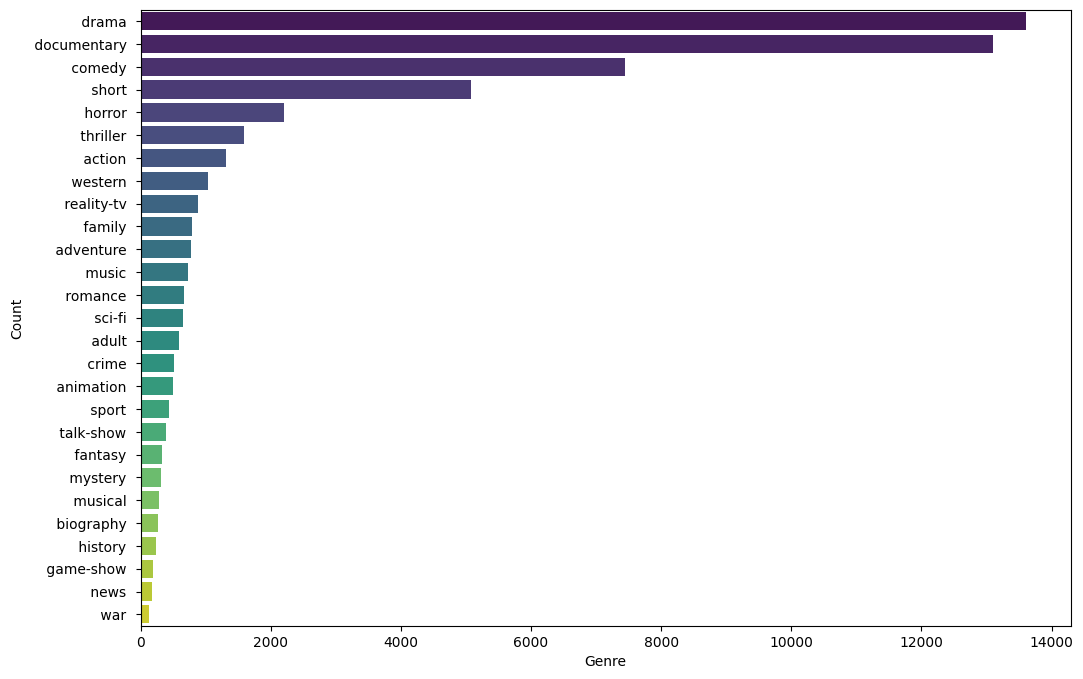

In [14]:
plt.figure(figsize=(12,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h',palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')

<ipython-input-15-a23c9a0e0af1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts,palette='viridis')


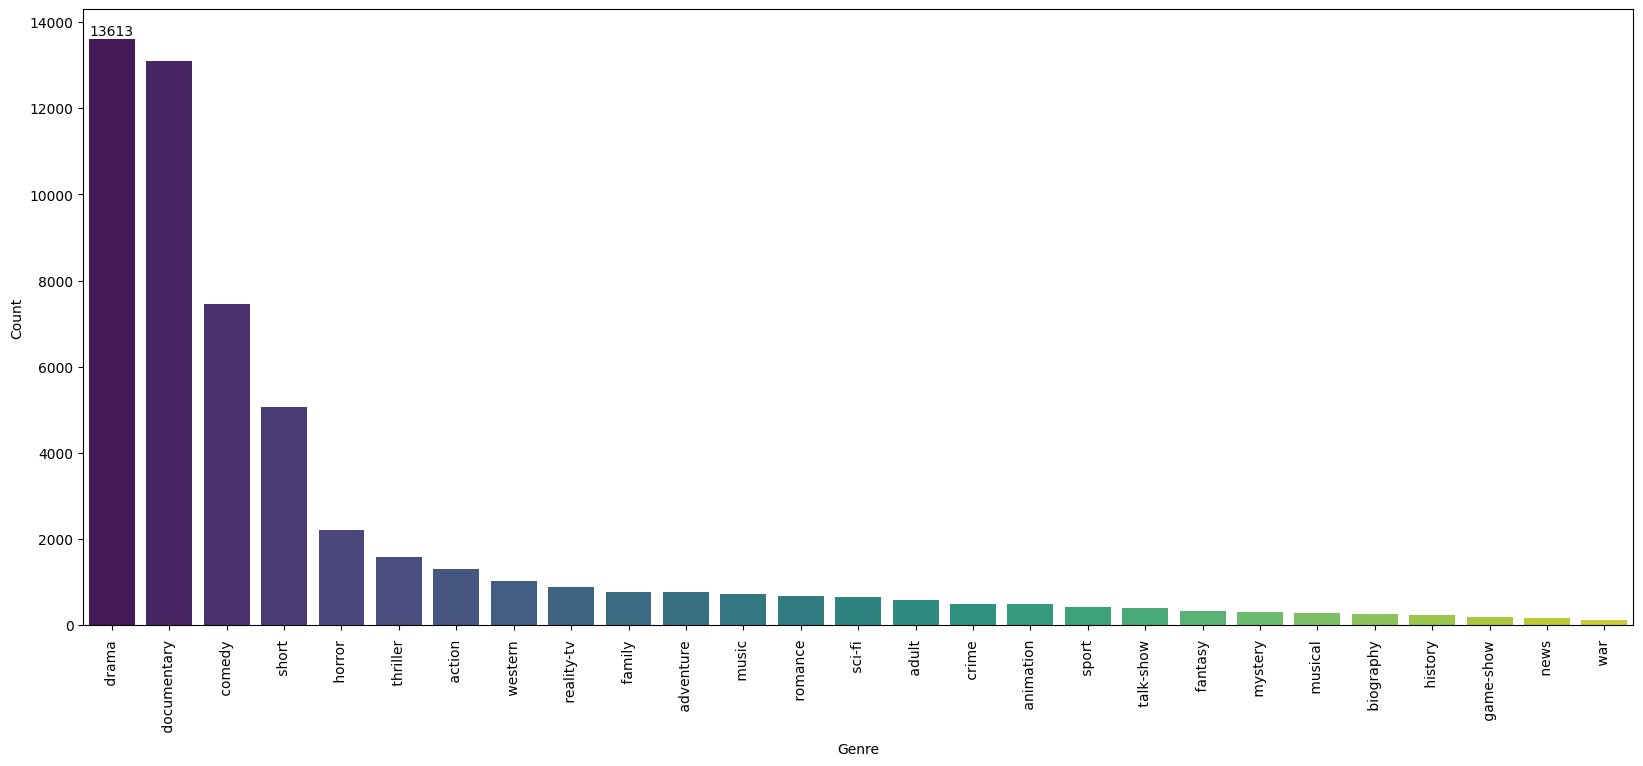

In [15]:
#Plot to show the genre distribution across the training dataset
plt.figure(figsize=(20,8))
counts = train_data.Genre.value_counts()
ax = sns.barplot(x=counts.index, y=counts,palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);
ax.bar_label(ax.containers[0]);

In [16]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


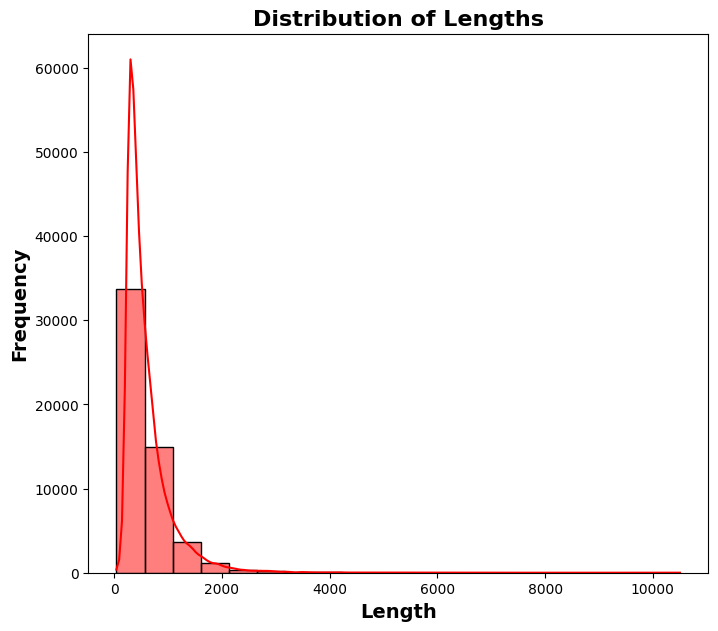

In [17]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='red')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

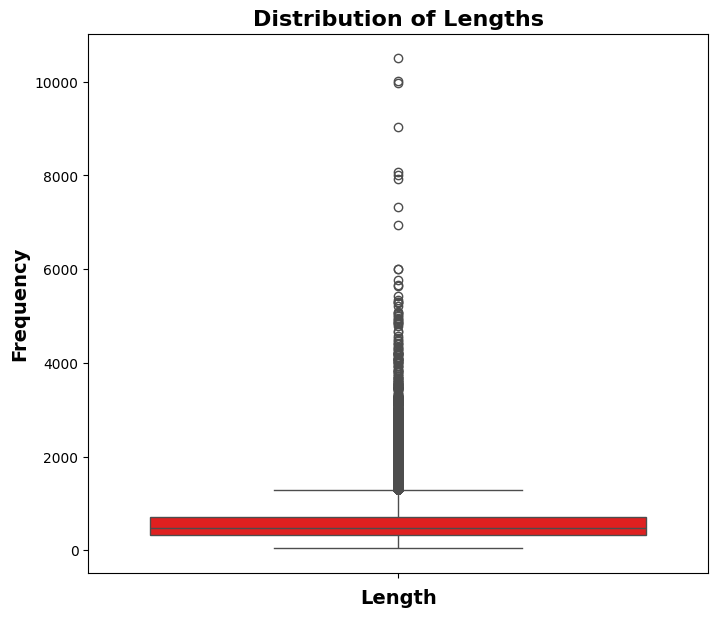

In [18]:
plt.figure(figsize=(8, 7))

sns.boxplot(data=train_data, y='length', color='red')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

#Data cleaning and preprocessing

In [19]:
!pip install nltk
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download the stopwords corpus

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
train_data['Text_Cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_Cleaning'] = test_data.Description.apply(clean_text)

In [21]:
train_data.head(10)

,Title,Genre,Description,length,Text_Cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1609,qual control consist sery singl tak shot film ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,345,tough econom tim max joey run idea discov seny...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,332,ron petry keanu reeves troubl teen whos lif ha...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",456,sud calamit event caus gre loss life damage ha...
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,426,four high school stud embark terr journey shad...


In [22]:
test_data.head(10)

,ID,Title,Description,Text_Cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern mart art superstar bruc lee appea...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,emy burn held capt room ide got determin escap...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,beauty neglect wif bril architect milan betray...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,vasu inamd ina suff disord pict see com dream ...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,insight tornado hit kens ris birmingham surpr ...
9,10,Press (2011),Press is a story of young people overwhelmed ...,press story young peopl overwhelm soc discord ...


In [23]:
train_data['length_Text_cleaning']=train_data['Text_Cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_Cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


In [24]:
test_data.head()

,ID,Title,Description,Text_Cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern mart art superstar bruc lee appea...


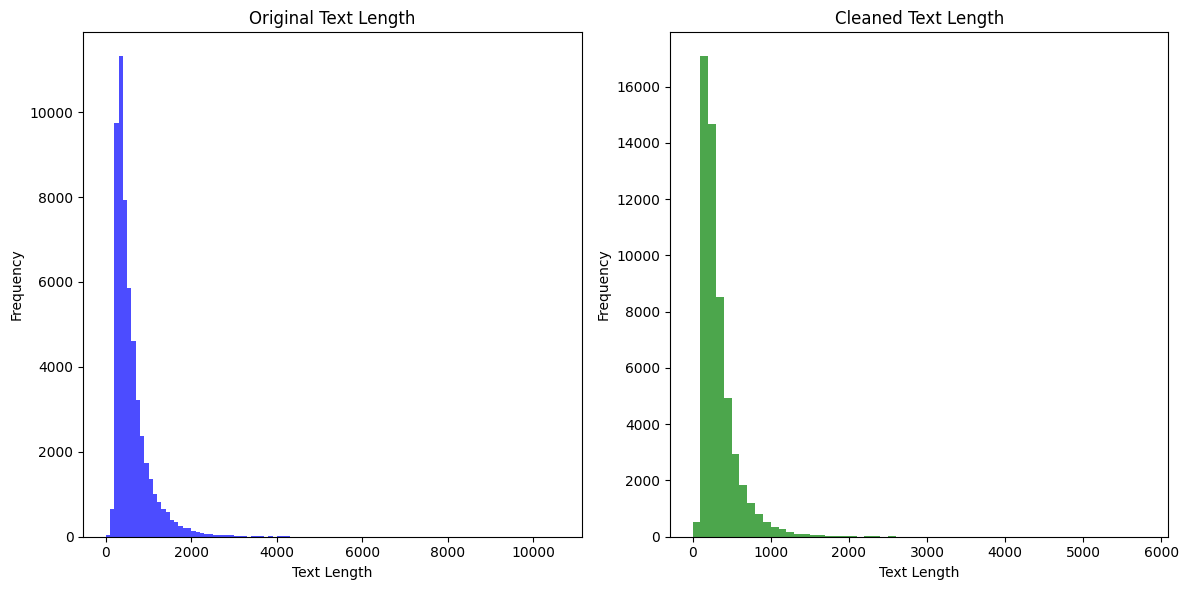

In [25]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_Cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

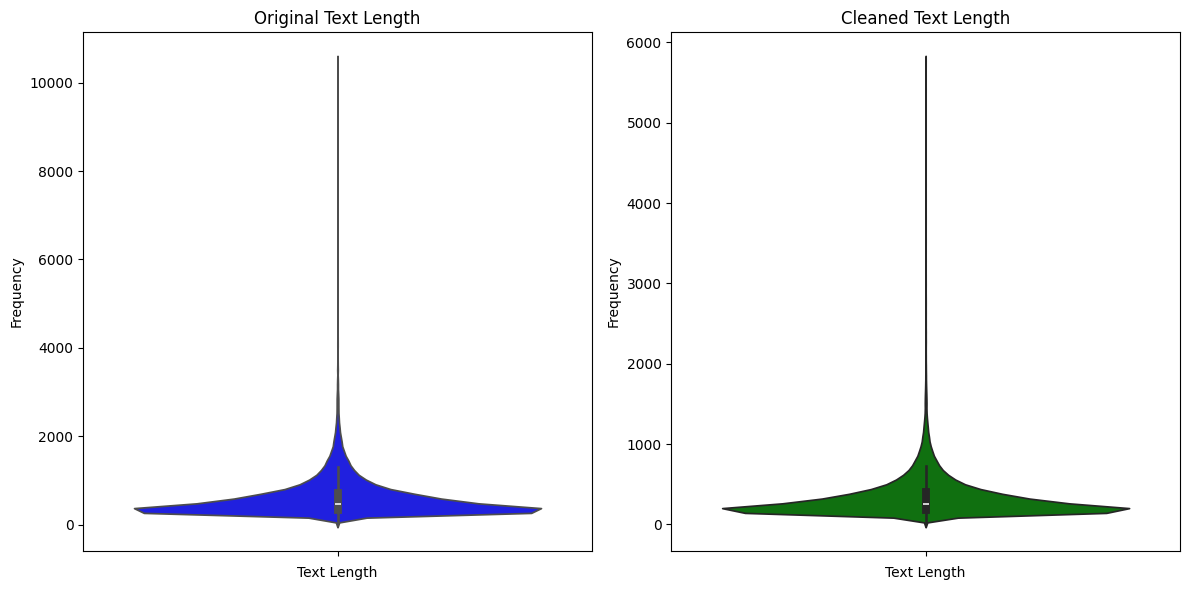

In [26]:
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
sns.violinplot(y=original_lengths, color='blue')
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
sns.violinplot(y=cleaned_lengths, color='green')
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
(train_data['length_Text_cleaning']>2000).value_counts()

length_Text_cleaning
False    54131
True        83
Name: count, dtype: int64

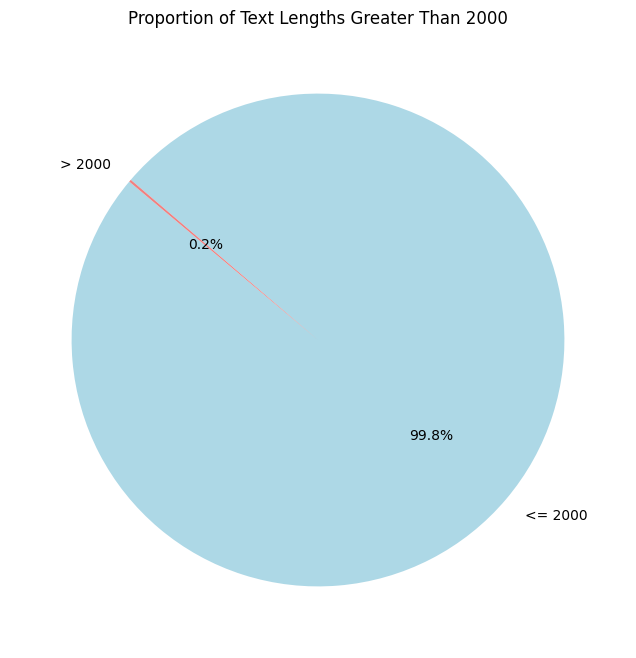

In [28]:
length_counts = (train_data['length_Text_cleaning'] > 2000).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(length_counts, labels=['<= 2000', '> 2000'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Proportion of Text Lengths Greater Than 2000')
plt.show()

In [29]:
#Remove extremely long descriptions: outliers
print('Dataframe size (before removal): ',len(train_data))
filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(train_data))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54131
Removed rows: 83


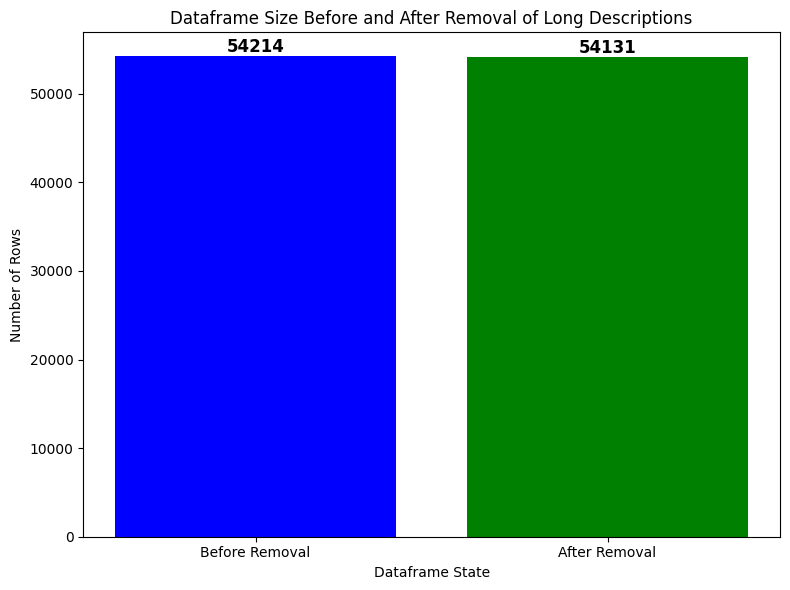

In [30]:
sizes = [len(train_data) + filt.sum(), len(train_data)]
labels = ['Before Removal', 'After Removal']

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'green'])
plt.xlabel('Dataframe State')
plt.ylabel('Number of Rows')
plt.title('Dataframe Size Before and After Removal of Long Descriptions')

# Display the count of removed rows
for i, size in enumerate(sizes):
    plt.text(i, size + 5, f'{size}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

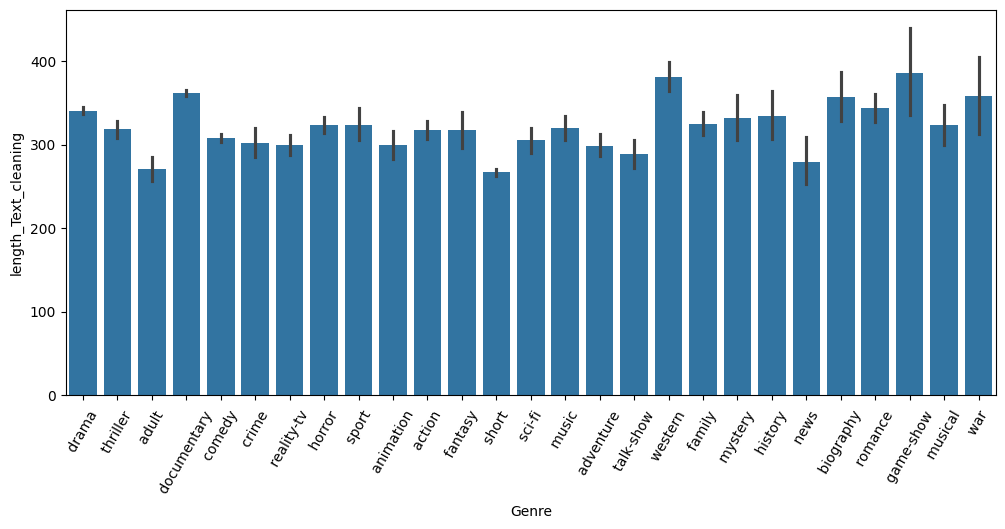

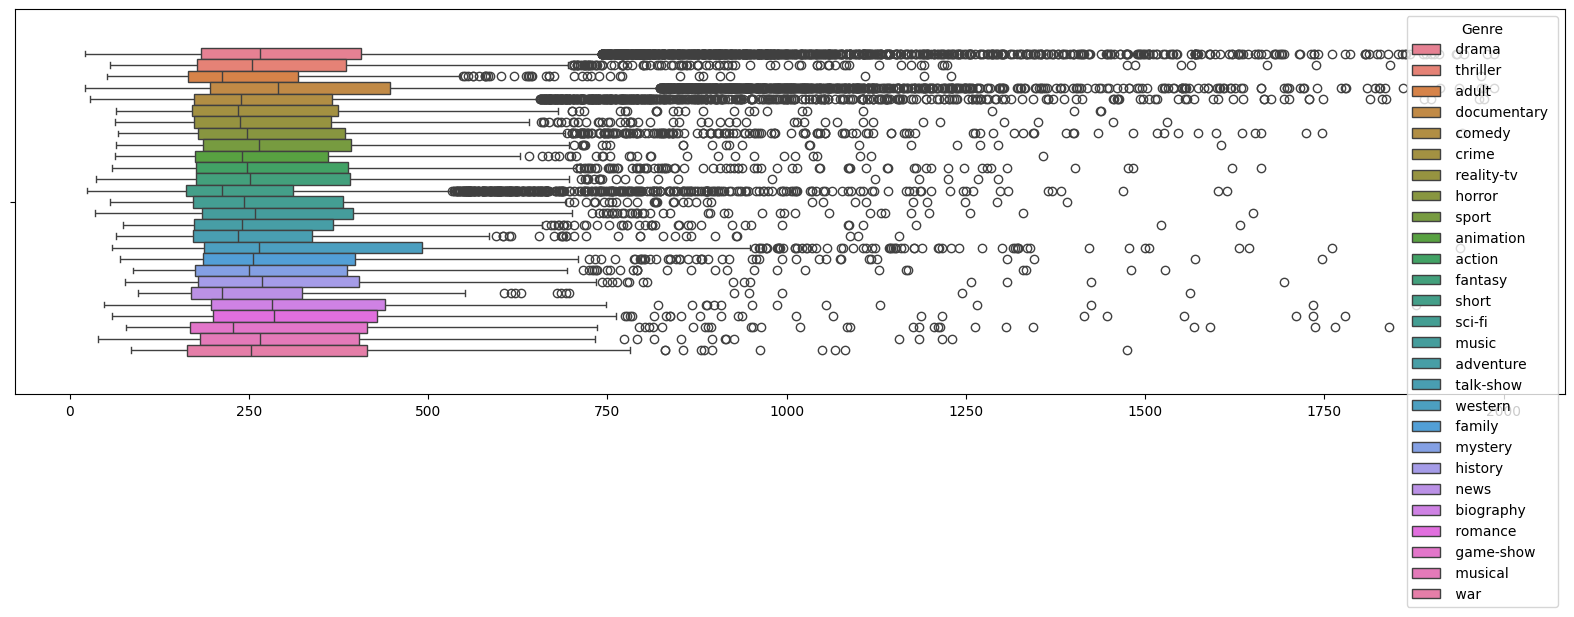

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()

#Text tokenization and vectorization

In [32]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_Cleaning'].values)

In [33]:
test_path='/content/drive/MyDrive/codsoft internship/Task_1/test_data_solution.txt'
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head(10)

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
5,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
6,7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
9,10,Press (2011),drama,Press is a story of young people overwhelmed ...


<ipython-input-34-1819cc11b15b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=counts.index, orient='h',palette='viridis')


Text(0, 0.5, 'Count')

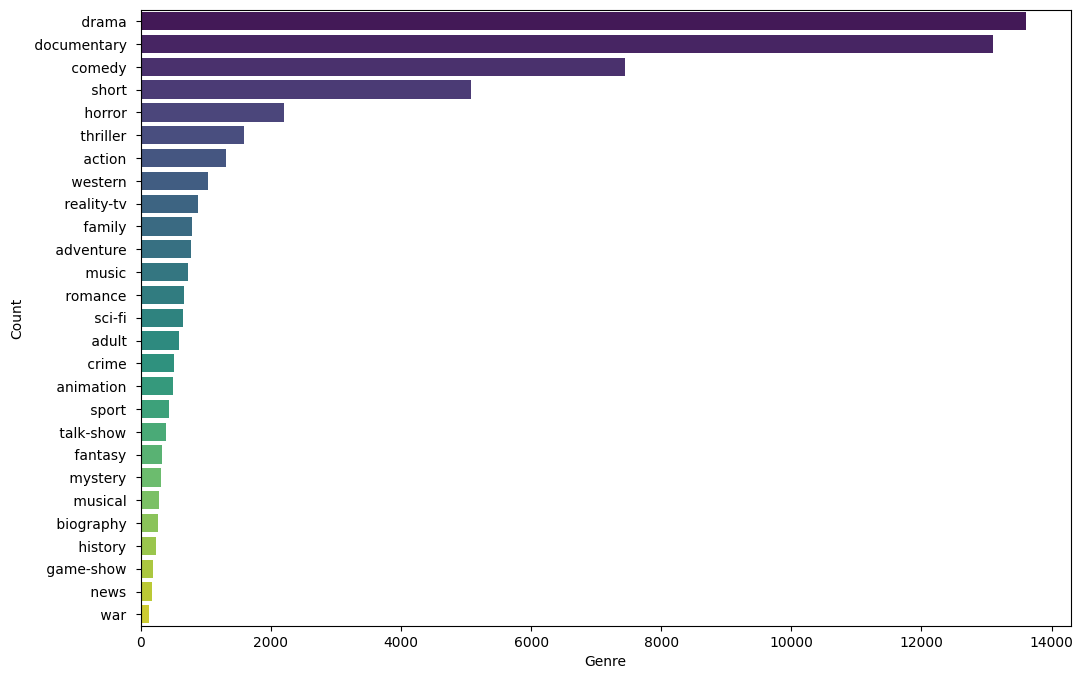

In [34]:
plt.figure(figsize=(12,8))
counts = test_data_solution.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h',palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')

#Text Vectorization (TF-IDF)

In [35]:
X = tokenizer.texts_to_sequences(train_data['Text_Cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_Cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

#Build the LSTM model

In [36]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model

In [37]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=8, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/8
1692/1692 [==============================] - 1255s 739ms/step - loss: 1.9206 - accuracy: 0.4433 - val_loss: 1.6574 - val_accuracy: 0.5192
Epoch 2/8
1692/1692 [==============================] - 1251s 739ms/step - loss: 1.4287 - accuracy: 0.5869 - val_loss: 1.5528 - val_accuracy: 0.5451
Epoch 3/8
1692/1692 [==============================] - 1246s 736ms/step - loss: 1.1088 - accuracy: 0.6796 - val_loss: 1.6076 - val_accuracy: 0.5465
Epoch 4/8
1692/1692 [==============================] - 1239s 732ms/step - loss: 0.8435 - accuracy: 0.7541 - val_loss: 1.7099 - val_accuracy: 0.5299


#Plotting Accuracy & Loss

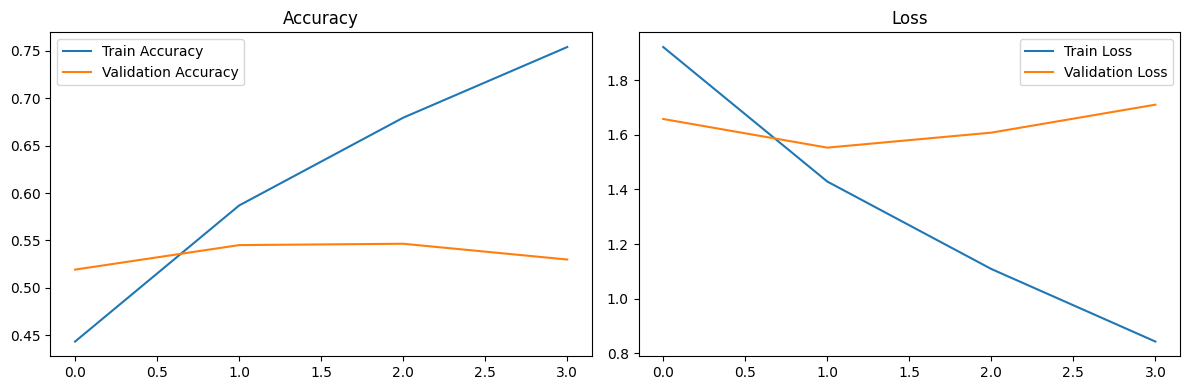

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

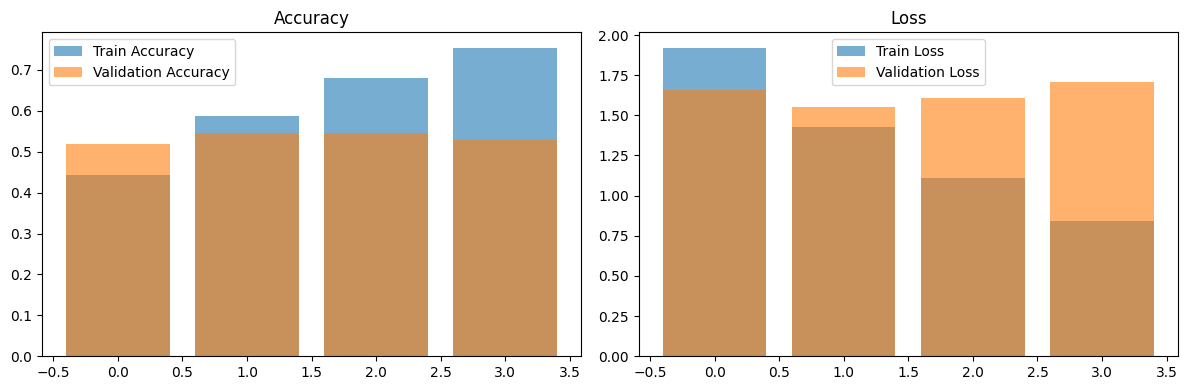

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train Accuracy', alpha=0.6)
plt.bar(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy', alpha=0.6)
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(len(history.history['loss'])), history.history['loss'], label='Train Loss', alpha=0.6)
plt.bar(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss', alpha=0.6)
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()
